<a href="https://colab.research.google.com/github/nongquocdat/AI/blob/main/Phan_loai_buoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


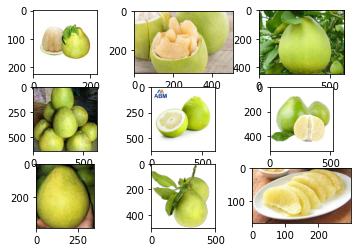

In [10]:
folder= '/content/drive/MyDrive/train/Phan_loai_buoi/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'buoi_nam_roi'+str(i+1)+'.jfif'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [11]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/train/Phan_loai_buoi/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('buoi_da_xanh'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('buoi_nam_roi'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('buoi_dien'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(63, 200, 200, 3) (63,)


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 2s/step - loss: 1287.5431 - accuracy: 0.2540
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 2493.2476 - accuracy: 0.3333
Epoch 3/50
2/2 [==============================] - 3s 2s/step - loss: 731.2779 - accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - 3s 2s/step - loss: 128.3729 - accuracy: 0.4603
Epoch 5/50
2/2 [==============================] - 3s 2s/step - loss: 68.1483 - accuracy: 0.5238
Epoch 6/50
2/2 [==============================] - 3s 2s/step - loss: 20.1621 - accuracy: 0.6190
Epoch 7/50
2/2 [==============================] - 3s 2s/step - loss: 5.0368 - accuracy: 0.6825
Epoch 8/50
2/2 [==============================] - 3s 2s/step - loss: 1.8012 - accuracy: 0.7619
Epoch 9/50
2/2 [==============================] - 4s 2s/step - loss: 0.0902 - accuracy: 0.9841
Epoch 10/50
2/2 [==============================] - 3s 2s/step - loss: 0.0969 - accuracy: 0.9841
Epoch 11/50
2/2 [====================

In [13]:
model.evaluate(photos,labels)

2/2 [==============================] - 2s 832ms/step - loss: 5.8658e-08 - accuracy: 1.0000


[5.8658432777747294e-08, 1.0]

In [16]:
model.save('Fruits_Classification')
from keras.models import load_model
models=load_model('Fruits_Classification')
classes = ["buoi_da_xanh","buoi_nam_roi","buoi_dien"]
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

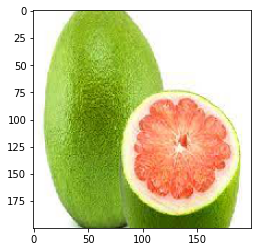

In [25]:
img = load_img('test.jfif', target_size=(200,200))
plt.imshow(img)

In [26]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.1432852  0.10188336 0.12933917 0.08289941 0.10804121 0.07069921
  0.08537605 0.10200445 0.08294284 0.09352909]]


'buoi_da_xanh'